До SMOTE:
Class
0    5689
1       7
Name: count, dtype: int64
После SMOTE:
Class
1    5689
0    5689
Name: count, dtype: int64
Logistic Regression - Accuracy: 0.9996
Logistic Regression - Recall: 1.0000
Logistic Regression - Precision: 0.9991
Logistic Regression - F1 Score: 0.9996
Logistic Regression - Confusion Matrix:
[[1159    1]
 [   0 1116]]

SVM - Accuracy: 0.9991
SVM - Recall: 1.0000
SVM - Precision: 0.9982
SVM - F1 Score: 0.9991
SVM - Confusion Matrix:
[[1158    2]
 [   0 1116]]

Random Forest - Accuracy: 1.0000
Random Forest - Recall: 1.0000
Random Forest - Precision: 1.0000
Random Forest - F1 Score: 1.0000
Random Forest - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Gradient Boosting - Accuracy: 1.0000
Gradient Boosting - Recall: 1.0000
Gradient Boosting - Precision: 1.0000
Gradient Boosting - F1 Score: 1.0000
Gradient Boosting - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Neural Network - Accuracy: 0.9996
Neural Network - Recall: 1.0000
Neural Network - Precision: 0.9991


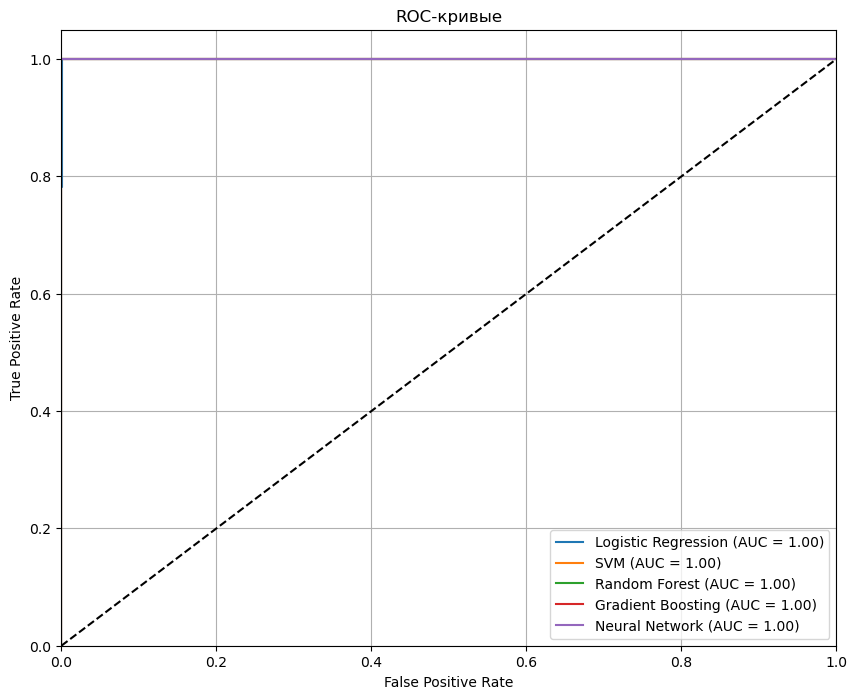

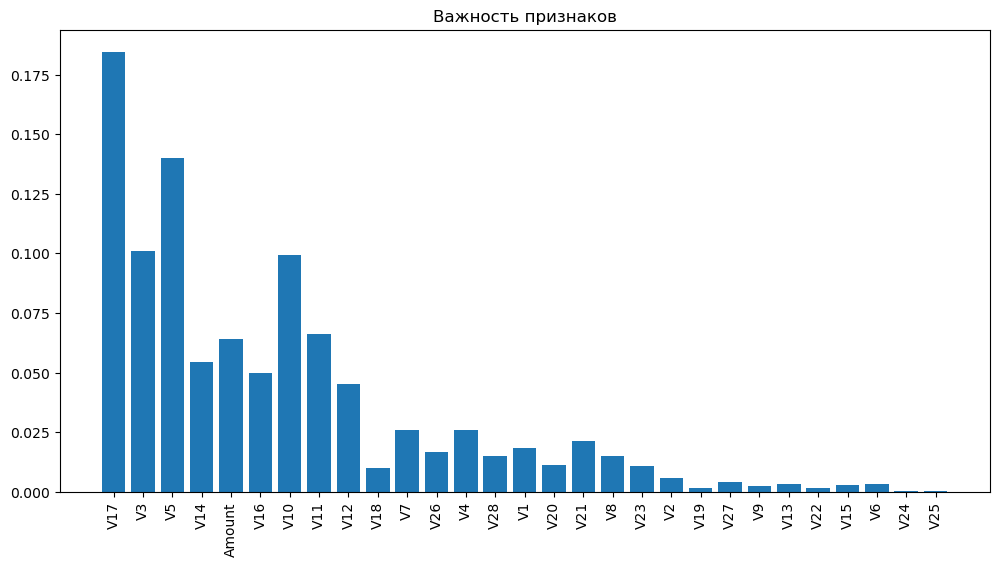

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Загрузка данных из CSV файла
df = pd.read_csv("data/creditcard.csv")  # Загружаем данные кредитных карт из файла

# Уменьшение выборки для ускорения вычислений
# Выбор только 2% данных для примера, чтобы ускорить обработку и демонстрацию

df_reduced = df.sample(frac=0.02, random_state=42)  # Случайная выборка 2% данных с фиксированным seed для воспроизводимости

# Масштабирование столбца Amount
# Столбец "Amount" имеет значения транзакций, которые могут варьироваться в широком диапазоне
# Масштабируем значения, чтобы они имели стандартное нормальное распределение (среднее = 0, стандартное отклонение = 1)
scaler = StandardScaler()  # Создаем объект StandardScaler
df_reduced['Amount'] = scaler.fit_transform(df_reduced[['Amount']])  # Применяем масштабирование только к столбцу "Amount"

# Разделение данных на признаки (X) и целевую переменную (y)
# Убираем столбцы "Time" и "Class" из признаков, так как "Class" — это целевая переменная, а "Time" не информативен
X = df_reduced.drop(['Time', 'Class'], axis=1)  # Признаки для обучения
y = df_reduced['Class']  # Целевая переменная, указывающая класс транзакции (мошенничество или нет)

# Проверка баланса классов до применения SMOTE
# Проверяем, сколько наблюдений приходится на каждый класс (0 — нормальные транзакции, 1 — мошеннические)
print("До SMOTE:")
print(y.value_counts())  # Выводим количество классов до применения метода SMOTE

sm = SMOTE(random_state=42)  # Создаём объект SMOTE с фиксированным seed для воспроизводимости
X_res, y_res = sm.fit_resample(X, y)

# Проверка баланса классов после применения SMOTE
# Снова проверяем количество наблюдений для каждого класса, чтобы убедиться, что данные сбалансированы
print("После SMOTE:")
print(pd.Series(y_res).value_counts())  # Выводим количество классов после применения метода SMOTE

# Разделение данных на обучающую и тестовую выборки
# Мы разделяем данные на 80% для обучения и 20% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)  # Фиксируем seed для воспроизводимости

# Обучение моделей классификации
# Создаем словарь, где ключи — названия моделей, а значения — сами модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Логистическая регрессия с увеличенным числом итераций
    "SVM": SVC(probability=True),  # Метод опорных векторов с вероятностным выходом
    "Random Forest": RandomForestClassifier(),  # Случайный лес (ансамблевый метод)
    "Gradient Boosting": GradientBoostingClassifier(),  # Градиентный бустинг
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, alpha=1e-4,  # Нейронная сеть с одним скрытым слоем (50 нейронов)
                                      solver='sgd', random_state=42, learning_rate_init=.1)  # Используем стохастический градиентный спуск
}

# Обучаем каждую модель на обучающих данных
for name, model in models.items():
    model.fit(X_train, y_train)  # Тренируем модель на данных X_train и y_train

# Оценка моделей
# Для каждой модели вычисляем метрики: точность, полноту, точность, F1-меру, матрицу ошибок
for name, model in models.items():
    y_pred = model.predict(X_test)  # Предсказываем классы на тестовой выборке
    accuracy = accuracy_score(y_test, y_pred)  # Метрика точности
    recall = recall_score(y_test, y_pred)  # Метрика полноты (доля правильно предсказанных мошеннических транзакций)
    precision = precision_score(y_test, y_pred)  # Метрика точности (доля правильных среди предсказанных мошенничеств)
    f1 = f1_score(y_test, y_pred)  # F1-мера (сбалансированная метрика между точностью и полнотой)
    cm = confusion_matrix(y_test, y_pred)  # Матрица ошибок (показывает, сколько наблюдений правильно/неправильно классифицировано)
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - F1 Score: {f1:.4f}")
    print(f"{name} - Confusion Matrix:\n{cm}\n")

# Построение ROC-кривых
# ROC-кривая показывает соотношение между ложноположительными и истинноположительными результатами для различных порогов
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Если модель может предсказывать вероятности
        y_prob = model.predict_proba(X_test)[:, 1]  # Предсказываем вероятность для положительного класса
    else:
        y_prob = model.decision_function(X_test)  # Для SVM используем decision_function
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Вычисляем показатели для ROC-кривой
    roc_auc = roc_auc_score(y_test, y_prob)  # Вычисляем площадь под ROC-кривой (AUC)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')  # Строим кривую для каждой модели

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Оценка важности признаков для модели случайного леса
# Важность признаков показывает, какие признаки имеют наибольшее влияние на предсказания модели
importances = models["Random Forest"].feature_importances_  # Извлечение важность признаков из модели случайного леса

plt.figure(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X_res.shape[1]), importances[indices], align="center")
plt.xticks(range(X_res.shape[1]), X.columns[indices], rotation=90)
plt.show()